In [13]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.io import loadmat

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

# tell pandas to show all columns when we display a DataFrame
pd.set_option("display.max_columns", None)

Get AllenData sessions

In [8]:
basepath = "E:\Allensdk_data\local\ecephys_cache_dir"
manifest_path = os.path.join(basepath, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

sessions = cache.get_session_table()

Select a session randomly

In [9]:
session_id = 799864342
session = cache.get_session_data(session_id)

print(session.structure_acronyms)
print(session.stimulus_names)

['VISam', nan, 'COAa', 'CA1', 'LP', 'DG', 'VISmma', 'VISp', 'ProS', 'SUB', 'CA3', 'CA2', 'VISl', 'VISal', 'LGd', 'VISrl', 'APN', 'POL']
['spontaneous', 'gabors', 'flashes', 'drifting_gratings', 'natural_movie_three', 'natural_movie_one', 'static_gratings', 'natural_scenes', 'drifting_gratings_contrast']


Select 'drifting_gratings' stimuli with contrast 0.8 and temporal_frequency 15.0, but 8 different orientations. 
Each stimuli was presented 15 times for 2 seconds


In [65]:
stim_table = session.get_stimulus_table('drifting_gratings')
print(stim_table['temporal_frequency'].value_counts())

stim_orientation_table = stim_table[stim_table['temporal_frequency'] == 15.0 ]
print(stim_orientation_table['orientation'].value_counts())
print(stim_orientation_table['stimulus_condition_id'].value_counts())
stim_orientation_table.head()

15.0    120
8.0     120
4.0     120
2.0     120
1.0     120
null     30
Name: temporal_frequency, dtype: int64
270.0    15
45.0     15
315.0    15
90.0     15
135.0    15
180.0    15
225.0    15
0.0      15
Name: orientation, dtype: int64
254    15
252    15
248    15
247    15
277    15
272    15
267    15
256    15
Name: stimulus_condition_id, dtype: int64


,contrast,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,
3799,0.8,135,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,1593.313231,2,drifting_gratings,1595.314911,15,2.00168,247
3800,0.8,45,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,1596.315739,2,drifting_gratings,1598.317439,15,2.00170,248
3805,0.8,0,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,1611.328291,2,drifting_gratings,1613.329971,15,2.00168,252
3807,0.8,90,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,1617.333321,2,drifting_gratings,1619.334971,15,2.00165,254
3809,0.8,315,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,1623.338331,2,drifting_gratings,1625.340001,15,2.00167,256


Select units from CA1 area

In [67]:
units = session.units[session.units["ecephys_structure_acronym"] == 'CA1']
units.tail()

,isi_violations,waveform_amplitude,waveform_spread,waveform_duration,nn_hit_rate,snr,peak_channel_id,cluster_id,waveform_PT_ratio,max_drift,presence_ratio,local_index_unit,waveform_halfwidth,waveform_velocity_below,amplitude_cutoff,cumulative_drift,firing_rate,nn_miss_rate,silhouette_score,d_prime,waveform_recovery_slope,waveform_repolarization_slope,isolation_distance,waveform_velocity_above,L_ratio,c50_dg,area_rf,fano_dg,fano_fl,fano_ns,fano_rf,fano_sg,f1_f0_dg,g_dsi_dg,g_osi_dg,g_osi_sg,azimuth_rf,mod_idx_dg,p_value_rf,pref_sf_sg,pref_tf_dg,run_mod_dg,run_mod_fl,run_mod_ns,run_mod_rf,run_mod_sg,pref_ori_dg,pref_ori_sg,run_pval_dg,run_pval_fl,run_pval_ns,run_pval_rf,run_pval_sg,elevation_rf,pref_image_ns,pref_phase_sg,firing_rate_dg,firing_rate_fl,firing_rate_ns,firing_rate_rf,firing_rate_sg,on_off_ratio_fl,time_to_peak_ns,pref_sf_multi_sg,pref_tf_multi_dg,pref_ori_multi_dg,pref_ori_multi_sg,pref_phase_multi_sg,image_selectivity_ns,pref_image_multi_ns,lifetime_sparseness_dg,lifetime_sparseness_fl,lifetime_sparseness_ns,lifetime_sparseness_rf,lifetime_sparseness_sg,probe_vertical_position,probe_horizontal_position,probe_id,channel_local_index,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
951107329,0.391688,124.571265,80.0,0.769179,0.766747,1.809466,849841894,250,0.395924,69.52,0.99,237,0.123618,-1.049773,0.004334,261.06,5.648617,0.007614,0.025430,2.241066,-0.011354,0.442522,38.891429,-0.343384,0.053086,NaN,300.0,2.577554,1.576296,5.117209,0.933333,2.138566,0.589416,0.022189,0.053186,0.035594,50.000,0.312820,0.467,0.32,8.0,0.377193,NaN,0.758065,0.483333,0.119048,270.0,0.0,0.256414,NaN,0.227752,0.022441,0.801773,-30.000,4939,0.00,4.792938,2.744399,4.314374,7.582273,4.510893,NaN,0.0695,False,False,False,False,False,0.163695,False,0.021140,0.004702,0.039252,0.035882,0.040221,2660,11,805579713,265,382.0,CA1,7433.0,1803.0,8433.0,probeF,See electrode locations,30000.035925,1250.001497,True
951107258,0.137471,311.748060,90.0,0.837856,0.983092,3.974311,849841894,241,0.300782,50.36,0.99,228,0.123618,-0.809404,0.000678,197.25,1.890771,0.000203,0.182608,3.312881,-0.087056,1.052648,65.524487,-0.343384,0.000868,NaN,100.0,10.229457,0.906667,2.020000,1.390476,2.520696,1.240197,0.097338,0.029361,0.125541,10.000,0.529263,0.595,0.32,1.0,0.693966,NaN,-1.000000,NaN,0.453488,270.0,90.0,0.337798,NaN,0.000010,NaN,0.570020,50.000,5009,0.75,2.134372,0.373025,2.334182,0.245615,2.718393,NaN,0.0055,False,False,False,False,False,0.101220,False,0.111522,0.000000,0.064202,0.644169,0.064907,2660,11,805579713,265,382.0,CA1,7433.0,1803.0,8433.0,probeF,See electrode locations,30000.035925,1250.001497,True
951107232,0.470673,212.638140,70.0,0.920268,0.876812,3.071296,849841894,238,0.270070,63.48,0.99,225,0.123618,-0.755444,0.000651,216.25,4.412142,0.004236,0.086937,2.826327,-0.006083,0.755066,42.099280,-0.343384,0.030492,0.013278,600.0,10.974713,3.266667,2.392710,2.423188,1.925247,0.843320,0.047693,0.041212,0.087045,58.333,0.818824,0.733,0.04,4.0,NaN,NaN,-0.852201,-0.704545,-0.825758,90.0,30.0,NaN,NaN,0.003841,0.183126,0.011984,-13.333,4953,0.75,4.161257,3.144069,5.405226,1.345401,4.338371,NaN,0.0235,False,False,False,False,False,0.138695,False,0.029270,0.000574,0.037956,0.319657,0.054789,2660,11,805579713,265,382.0,CA1,7433.0,1803.0,8433.0,probeF,See electrode locations,30000.035925,1250.001497,True
951107337,0.000000,173.932590,110.0,0.686767,0.989899,2.216996,849841898,251,0.317019,51.72,0.99,238,0.137353,-0.950028,0.000911,367.11,2.263530,0.000271,0.143968,4.186633,-0.028142,0.391308,75.301158,1.030151,0.000167,0.047506,900.0,5.762162,1.695484,3.235652,1.544444,2.964539,0.856675,0.102678,0.102484,0.025767,72.222,2.083427,0.846,0.32,15.0,0.255061,NaN,0.209756,0.125000,-0.685484,0.0,60.0

Count spikes in 100ms bins after stimuli onset and spaning a total of 2 seconds

In [66]:
print(stim_orientation_table.duration)
time_step = 0.1
time_bins = np.arange(0, 2 + time_step, time_step)
time_bins

stimulus_presentation_id
3799     2.00168
3800     2.00170
3805     2.00168
3807     2.00165
3809     2.00167
          ...   
49396    2.00167
49409    2.00167
49416    2.00166
49421    2.00169
49426    2.00167
Name: duration, Length: 120, dtype: float64


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [108]:
spike_counts = session.presentationwise_spike_counts(
    stimulus_presentation_ids=stim_orientation_table.index.values,  
    bin_edges=time_bins,
    unit_ids=units.index.values
)
print(spike_counts.shape)
print(spike_counts.coords)
spike_counts['stimulus_presentation_id'].values.shape

(120, 20, 109)
Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 3799 ... 49426
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 0.05 ... 1.95
  * unit_id                          (unit_id) int64 951087020 ... 951107281


(120,)

(120, 20, 109)
(2400, 109)


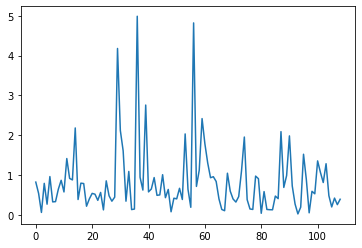

In [97]:
# convert spike_counts structure from stimulus_presentation_id*time_bins* unit_id 
# to stimulus_bins_counts * units, (120, 20, 109) -> (2400, 109)

counts_matrix = spike_counts.values
print(counts_matrix.shape)
CA1_counts = counts_matrix.reshape(counts_matrix.shape[0]*counts_matrix.shape[1], counts_matrix.shape[2])
print(CA1_counts.shape)

plt.figure()
plt.plot(CA1_counts.mean(0))

In [126]:
# get the stimuli array orientation (15*8)*20

orient_array = stim_orientation_table.loc[
    spike_counts['stimulus_presentation_id'].values, 'orientation']
print(orient_array.shape)
print(orient_array.values)
stim_orient = np.repeat(orient_array.values, counts_matrix.shape[1])
print(stim_orient.shape)
print(stim_orient)

(120,)
[135.0 45.0 0.0 90.0 315.0 225.0 90.0 45.0 270.0 135.0 315.0 315.0 180.0
 135.0 180.0 0.0 180.0 225.0 180.0 315.0 45.0 90.0 315.0 180.0 90.0 45.0
 90.0 225.0 0.0 90.0 45.0 180.0 180.0 315.0 315.0 315.0 45.0 225.0 45.0
 225.0 0.0 225.0 135.0 315.0 0.0 90.0 180.0 90.0 315.0 270.0 135.0 315.0
 225.0 90.0 225.0 225.0 180.0 270.0 180.0 180.0 135.0 0.0 315.0 45.0 45.0
 270.0 90.0 90.0 135.0 225.0 90.0 270.0 0.0 45.0 0.0 45.0 135.0 180.0 45.0
 270.0 0.0 225.0 45.0 135.0 225.0 315.0 0.0 270.0 270.0 90.0 225.0 270.0
 270.0 135.0 45.0 270.0 90.0 0.0 135.0 225.0 270.0 135.0 0.0 0.0 270.0
 180.0 90.0 315.0 0.0 315.0 135.0 45.0 270.0 135.0 225.0 135.0 180.0 270.0
 180.0 0.0]
(2400,)
[135.0 135.0 135.0 ... 0.0 0.0 0.0]
